In [1]:
train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset\\Train'
validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset\\Validation'
test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset\\Test'

In [2]:
import os
import shutil
import glob
import random

CATEGORIES=['watermelon']

for category in CATEGORIES:
    src_path=os.path.join(train_dir,category)
    imgs_to_be_moved = random.sample(glob.glob(os.path.join(src_path,"*.jpg")), 40)
    for img in enumerate(imgs_to_be_moved):
        dest = os.path.join(validation_dir,category)
        if not os.path.exists(dest):
            os.makedirs(dest)
    for img in enumerate(imgs_to_be_moved):
        shutil.copy(img[1], dest)
        os.remove(img[1])

In [3]:
for category in CATEGORIES:
    src_path=os.path.join(train_dir,category)
    imgs_to_be_moved = random.sample(glob.glob(os.path.join(src_path,"*.jpg")), 80)
    for img in enumerate(imgs_to_be_moved):
        dest = os.path.join(test_dir,category)
        if not os.path.exists(dest):
            os.makedirs(dest)
    for img in enumerate(imgs_to_be_moved):
        shutil.copy(img[1], dest)
        os.remove(img[1])

In [7]:
import cv2
import os

resized_images_100_100_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train'
resized_images_100_100_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test'
resized_images_100_100_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation'

CATEGORIES_TRAIN_DIR=['watermelon']
CATEGORIES_VALIDATION_DIR=['watermelon']
CATEGORIES_TEST_DIR=['watermelon']

for category in CATEGORIES_TRAIN_DIR:
    src_path=os.path.join(train_dir,category)
    dest_path = os.path.join(resized_images_100_100_train_dir,category)
    for src_img_name in os.listdir(src_path):
        try:
            img = cv2.imread(os.path.join(src_path,src_img_name))
            img = cv2.resize(img, (100,100))
            cv2.imwrite(os.path.join(dest_path,src_img_name),img)
        except Exception as e:
            pass

In [8]:
for category in CATEGORIES_VALIDATION_DIR:
    src_path=os.path.join(validation_dir,category)
    dest_path = os.path.join(resized_images_100_100_validation_dir,category)
    for src_img_name in os.listdir(src_path):
        try:
            img = cv2.imread(os.path.join(src_path,src_img_name))
            img = cv2.resize(img, (100,100))
            cv2.imwrite(os.path.join(dest_path,src_img_name),img)
        except Exception as e:
            pass

In [9]:
for category in CATEGORIES_TEST_DIR:
    src_path=os.path.join(test_dir,category)
    dest_path = os.path.join(resized_images_100_100_test_dir,category)
    for src_img_name in os.listdir(src_path):
        try:
            img = cv2.imread(os.path.join(src_path,src_img_name))
            img = cv2.resize(img, (100,100))
            cv2.imwrite(os.path.join(dest_path,src_img_name),img)
        except Exception as e:
            pass

In [15]:
import numpy as np
import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from keras.callbacks import ModelCheckpoint

fruitNetModel=models.Sequential()

fruitNetModel.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)))
fruitNetModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Conv2D(512, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(512, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Flatten())
fruitNetModel.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
fruitNetModel.add(layers.Dropout(0.2))
fruitNetModel.add(layers.Dense(4, activation='softmax'))

fruitNetModel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
fruitNetModel.summary()

filepath="FruitNet_Indus_Fruits_4_classes_100_100_1st Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 96, 96, 64)        36928     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 94, 94, 128)       73856     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 92, 92, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 46, 46, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 46, 46, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 44, 44, 128)       147584    
__________

In [16]:
batch_size=16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation  and test data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        resized_images_100_100_train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        resized_images_100_100_validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

test_generator = test_datagen.flow_from_directory(
        resized_images_100_100_test_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 1600 images belonging to 4 classes.
Found 160 images belonging to 4 classes.
Found 320 images belonging to 4 classes.


In [17]:
number_of_training_samples=1600
number_of_validation_samples=160
number_of_test_samples=320

In [18]:
import math

history = fruitNetModel.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=200,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Epoch 1/200
100/100 [==============================] - 30s 304ms/step - loss: 1.3390 - categorical_accuracy: 0.3312 - val_loss: 1.0470 - val_categorical_accuracy: 0.5000
Epoch 2/200
100/100 [==============================] - 21s 208ms/step - loss: 1.1213 - categorical_accuracy: 0.4869 - val_loss: 1.1102 - val_categorical_accuracy: 0.4500
Epoch 3/200
100/100 [==============================] - 21s 208ms/step - loss: 1.0156 - categorical_accuracy: 0.5225 - val_loss: 0.8645 - val_categorical_accuracy: 0.6750
Epoch 4/200
100/100 [==============================] - 21s 208ms/step - loss: 0.9250 - categorical_accuracy: 0.5812 - val_loss: 0.8391 - val_categorical_accuracy: 0.6438
Epoch 5/200
100/100 [==============================] - 21s 208ms/step - loss: 0.8820 - categorical_accuracy: 0.6213 - val_loss: 0.8219 - val_categorical_accuracy: 0.6687
Epoch 6/200
100/100 [==============================] - 21s 208ms/step - loss: 0.8315 - categorical_accuracy: 0.6488 - val_loss: 0.8401 - val_categoric

Epoch 49/200
100/100 [==============================] - 21s 211ms/step - loss: 0.3475 - categorical_accuracy: 0.8762 - val_loss: 0.4341 - val_categorical_accuracy: 0.8688
Epoch 50/200
100/100 [==============================] - 21s 212ms/step - loss: 0.3560 - categorical_accuracy: 0.8750 - val_loss: 0.4617 - val_categorical_accuracy: 0.8438
Epoch 51/200
100/100 [==============================] - 21s 212ms/step - loss: 0.3276 - categorical_accuracy: 0.8762 - val_loss: 0.3599 - val_categorical_accuracy: 0.8812
Epoch 52/200
100/100 [==============================] - 21s 212ms/step - loss: 0.3119 - categorical_accuracy: 0.8831 - val_loss: 0.3725 - val_categorical_accuracy: 0.8688
Epoch 53/200
100/100 [==============================] - 21s 213ms/step - loss: 0.3388 - categorical_accuracy: 0.8775 - val_loss: 0.3267 - val_categorical_accuracy: 0.8875
Epoch 54/200
100/100 [==============================] - 21s 208ms/step - loss: 0.3339 - categorical_accuracy: 0.8794 - val_loss: 0.4249 - val_cat

Epoch 144/200
100/100 [==============================] - 21s 209ms/step - loss: 0.1178 - categorical_accuracy: 0.9669 - val_loss: 0.3953 - val_categorical_accuracy: 0.8875
Epoch 145/200
100/100 [==============================] - 21s 209ms/step - loss: 0.1425 - categorical_accuracy: 0.9619 - val_loss: 0.2409 - val_categorical_accuracy: 0.9313
Epoch 146/200
100/100 [==============================] - 21s 209ms/step - loss: 0.1552 - categorical_accuracy: 0.9550 - val_loss: 0.3178 - val_categorical_accuracy: 0.8938
Epoch 147/200
100/100 [==============================] - 21s 209ms/step - loss: 0.1308 - categorical_accuracy: 0.9587 - val_loss: 0.3772 - val_categorical_accuracy: 0.9187
Epoch 148/200
100/100 [==============================] - 21s 209ms/step - loss: 0.1357 - categorical_accuracy: 0.9606 - val_loss: 0.4433 - val_categorical_accuracy: 0.9000
Epoch 149/200
100/100 [==============================] - 21s 209ms/step - loss: 0.1340 - categorical_accuracy: 0.9556 - val_loss: 0.4402 - v

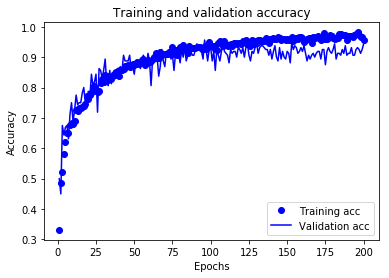

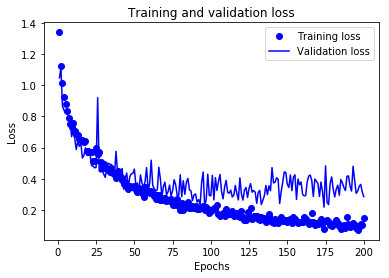

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
from tensorflow.python.keras.models import load_model

best_model = load_model('FruitNet_Indus_Fruits_4_classes_100_100_1st Experiment.h5')

In [21]:
from tensorflow.python.keras.models import load_model

steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_generator, steps=steps_test,verbose=1)
print("Test-set accuracy: {0:.2%}".format(result[1]))

20/20 [==============================] - 2s 93ms/step - loss: 0.2740 - categorical_accuracy: 0.9219
Test-set accuracy: 92.19%


In [24]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.python.keras.utils import to_categorical
import cv2

apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\watermelon')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')

test_data = []
test_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    test_data.append(img)
    test_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (320, 100, 100, 3)
Total number of labels: (320, 1)


In [25]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=8)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

320/320 [==============================] - 2s 7ms/sample - loss: 0.2740 - categorical_accuracy: 0.9219
Loss on test set:  0.27404699064791205
Accuracy on test set:  0.921875


In [26]:
# Get predictions
preds = best_model.predict(test_data, batch_size=16,verbose=1)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(320,1))
print(predicted_labels.shape)
print(orig_test_labels.shape)

320/320 [==============================] - 1s 4ms/sample
(320, 1)
(320, 1)


<Figure size 432x288 with 0 Axes>

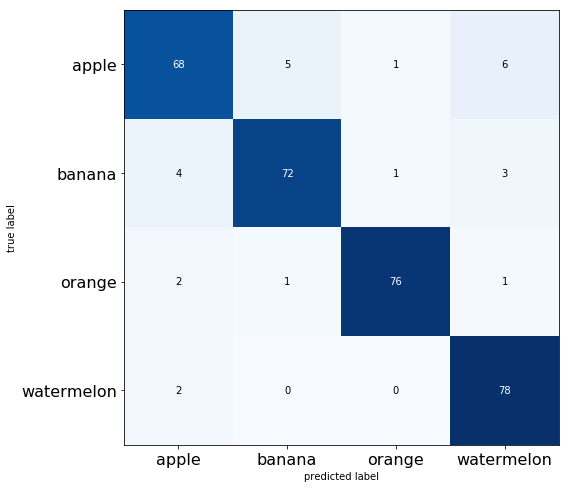

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(4), ['apple', 'banana','orange','watermelon'], fontsize=16)
plt.yticks(range(4), ['apple', 'banana','orange','watermelon'], fontsize=16)
plt.show()